## Malaria Detection (CNN) Using  Transfer Learning

In [4]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:

IMAGE_SIZE = [224, 224]

train_path = 'Dataset\Train'
valid_path = 'Dataset\Test'


In [4]:

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [5]:

for layer in mobilnet.layers:
    layer.trainable = False

In [6]:

folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:

x = Flatten()(mobilnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [7]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
training_set

In [8]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [16]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/50
13/13 [==============================] - 99s 8s/step - loss: 1.6161 - accuracy: 0.5216 - val_loss: 2.3524 - val_accuracy: 0.3284
Epoch 2/50
13/13 [==============================] - 102s 8s/step - loss: 0.7840 - accuracy: 0.6178 - val_loss: 0.5918 - val_accuracy: 0.6866
Epoch 3/50
13/13 [==============================] - 104s 8s/step - loss: 0.6321 - accuracy: 0.6683 - val_loss: 0.4671 - val_accuracy: 0.7164
Epoch 4/50
13/13 [==============================] - 105s 8s/step - loss: 0.4841 - accuracy: 0.7692 - val_loss: 0.8102 - val_accuracy: 0.6194
Epoch 5/50
13/13 [==============================] - 101s 8s/step - loss: 0.3462 - accuracy: 0.8438 - val_loss: 0.4206 - val_accuracy: 0.7612
Epoch 6/50
13/13 [==============================] - 101s 8s/step - loss: 0.3274 - accuracy: 0.8558 - val_loss: 0.4171 - val_accur

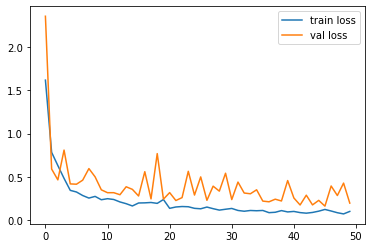

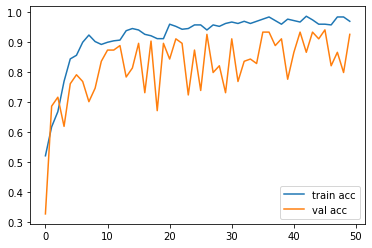

<Figure size 432x288 with 0 Axes>

In [17]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [9]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[9.99998927e-01, 1.06379798e-06],
       [9.99979377e-01, 2.06056102e-05],
       [4.69705313e-02, 9.53029454e-01],
       [1.46742657e-01, 8.53257298e-01],
       [4.49197739e-01, 5.50802231e-01],
       [1.11012146e-01, 8.88987780e-01],
       [8.68340433e-01, 1.31659552e-01],
       [9.72190738e-01, 2.78092977e-02],
       [7.82554805e-01, 2.17445165e-01],
       [4.61172536e-02, 9.53882754e-01],
       [6.82270646e-01, 3.17729384e-01],
       [9.96874571e-01, 3.12543684e-03],
       [5.88021517e-01, 4.11978483e-01],
       [2.81820409e-02, 9.71817911e-01],
       [9.99725640e-01, 2.74292484e-04],
       [9.99388218e-01, 6.11722935e-04],
       [9.95621264e-01, 4.37875139e-03],
       [1.32342070e-01, 8.67657959e-01],
       [6.22759700e-01, 3.77240300e-01],
       [9.86640394e-01, 1.33596221e-02],
       [9.82796133e-01, 1.72039475e-02],
       [9.02695179e-01, 9.73048806e-02],
       [9.99968410e-01, 3.15886718e-05],
       [7.57462502e-01, 2.42537439e-01],
       [9.995588

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
model=load_model('model_vgg19.h5')

In [3]:
img=image.load_img('Dataset/Test/Parasite/3.png',target_size=(224,224))

In [4]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

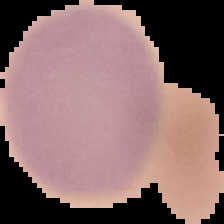

In [5]:
img

In [6]:

x=image.img_to_array(img)
x=x/255

In [7]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [8]:
x=np.expand_dims(x,axis=0)


In [9]:

result=model.predict(x)

In [10]:
print(result)

[[0.40896386 0.5910361 ]]


In [11]:
if(result[0][1]>result[0][0]):
    print("uninfected")
else:
    print("parasite")

uninfected
